In [1]:
%cd C:\Users\yukir\Documents\GitHub\Sign_Recognition\py

C:\Users\yukir\Documents\GitHub\Sign_Recognition\py


In [2]:
from basic_preprocessing import *
from deeplearning_check import *
from machine_learning import *

gpu_check()
set_global_determinism(seed=SEED)

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5252985652719265926
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6221575438774749104
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9869428032
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4023386553520796597
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 5031941895743884266
physical_device_desc: "device: XLA_GPU device"
]
tf 2.3.0
keras 2.4.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라


In [3]:
%cd C:\Users\yukir\Documents\Monicas_workspace\face
set_global_determinism(seed=1337)

C:\Users\yukir\Documents\Monicas_workspace\face


In [4]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import glob
import math
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
from IPython.display import Image

#cv
import cv2
import math
from PIL import Image
import math
from scipy import ndimage
import argparse
import imutils
import xml.etree.ElementTree as ET


#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.image as mpimg
from matplotlib import font_manager, rc
rc('font',family="AppleGothic")
plt.rcParams["font.family"]="AppleGothic" #plt 한글꺠짐
plt.rcParams["font.family"]="Arial" #외국어꺠짐
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.rc('figure', figsize=(10,8))

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},style='darkgrid')


In [5]:
import random 
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize

In [6]:
def get_file_list(path):
    file_list = os.listdir(path)
    file_list.sort()
    
    list_file = []
    for i in file_list:
        list_file.append(path+i)
    return list_file

def INPUT_IMG(path):
    i = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    return img

def get_img(path):
    data_path = os.path.join(path, '*png')
    files= glob.glob(data_path)
    img_list=[]
    for f1 in files:
        img = cv2.imread(f1, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_list.append(img)

    return img_list

def count_img(path):
    os.chdir(path)
    files = os.listdir(path)
    for num, i in enumerate(files):
        if i[-1] =='g':
            num +=1
    print('이미지 수', num)

def show(img):
    #사이즈
    plt.figure(figsize = (10,8))
    #xticks/yticks - 눈금표
    plt.xticks([])
    plt.yticks([])
    #코랩에서 안돌아감 주의
    plt.imshow(img, cmap= 'gray')
    plt.show()

In [7]:
TRAIN_PATH = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\face\\dataset\\'
TEST_PATH = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\face\\test\\'

In [8]:
IMG_WIDTH = 224
IMG_HEIGHT = 224
IMG_CHANNELS = 1

In [9]:
#read train image
train_ids = next(os.walk(TRAIN_PATH))[1] #subfolder extract
test_ids = next(os.walk(TEST_PATH))[2]

In [10]:
#empty array 만들기 as same dimension 
X_train = np.zeros((len(train_ids),IMG_HEIGHT,IMG_WIDTH), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH,1), dtype=np.bool)


In [11]:
#Train Image

for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH + id_
    # print(path)
    img_ = imread(path + '/image/' + id_ + '.PNG')[:,:]
    # img_ = cv2.imread(train_path, cv2.IMREAD_GRAYSCALE)
    # show(img_)
    hist, bins = np.histogram(img_.flatten(), 256,[0,256])

    cdf = hist.cumsum()

    # cdf의 값이 0인 경우는 mask처리를 하여 계산에서 제외
    # mask처리가 되면 Numpy 계산에서 제외가 됨
    # 아래는 cdf array에서 값이 0인 부분을 mask처리함
    cdf_m = np.ma.masked_equal(cdf,0)

    #History Equalization 공식
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

    # Mask처리를 했던 부분을 다시 0으로 변환
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
  
    img = cdf[img_]
    
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    # show(img)
    # print(img.shape)
    X_train[n] = img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/mask/'))[2]:
        # print(mask_file)
        # print(next(os.walk(path + '/mask/'))[2])
        mask_ = cv2.imread(path + '/mask/' + mask_file, cv2.IMREAD_GRAYSCALE) ## color Channel이 4로 나와서 그레이스케일로 뽑음
        # mask_ = mask_.reshape(224,224,1)
        # print(mask_.shape)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)
        # print(mask.shape)
    Y_train[n] = mask

100%|██████████| 62/62 [00:00<00:00, 150.85it/s]


In [12]:
#Test Image
X_test = np.zeros((len(test_ids),224,224), dtype= np.uint8)
sizes_test = []
for n, id_ in tqdm(enumerate(test_ids[:20]), total = len(test_ids[:20])):
    path = TEST_PATH
    img_ = imread(path+id_)
    img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
    hist, bins = np.histogram(img_.flatten(), 256,[0,256])

    cdf = hist.cumsum()

    # cdf의 값이 0인 경우는 mask처리를 하여 계산에서 제외
    # mask처리가 되면 Numpy 계산에서 제외가 됨
    # 아래는 cdf array에서 값이 0인 부분을 mask처리함
    cdf_m = np.ma.masked_equal(cdf,0)

    #History Equalization 공식
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

    # Mask처리를 했던 부분을 다시 0으로 변환
    cdf = np.ma.filled(cdf_m,0).astype('uint8')

    img = cdf[img_]
    # print(img.shape)
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT,IMG_WIDTH), mode = 'constant', preserve_range = True)
    X_test[n] = img

print('Done')

100%|██████████| 20/20 [00:00<00:00, 102.57it/s]

Done


### IMAGE CHECK

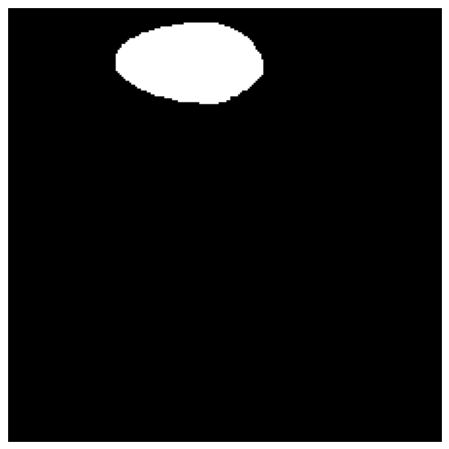

In [13]:
show(Y_train[1])

39


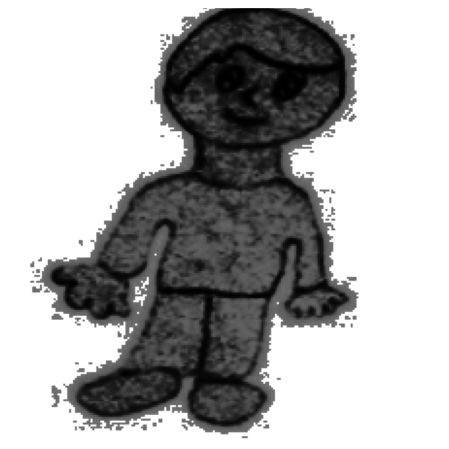

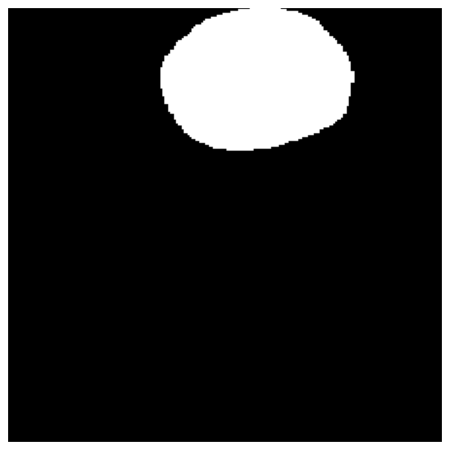

In [14]:
import random
image_x = random.randint(0, len(train_ids))
print(image_x)
show(X_train[image_x])
# plt.show()
show(Y_train[image_x])
# plt.show()

### u-net

In [15]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)) #define input layer
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs) #소숫점으로 바꿔줘야함(int-->float) (레이어에 파이썬 람다펑션사용) 

#Contraction path (Encoder)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)#normal = 가우시안
c1 = tf.keras.layers.Dropout(0.1)(c1) #drop 10% from c1
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1) 

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path (Decoder)
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5) #upscaling/Conv2DTranspose
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 


outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #back propogation 
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 224, 224, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 16) 160         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 224, 224, 16) 0           conv2d[0][0]                     
_______________________________________________________________________________________

In [16]:
import datetime

In [17]:
dir_name = 'learning_log'

def make_tensorboard_dir(dir_name):
    root_loddir = os.path.join(os.curdir, dir_name)
    sub_dir_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    return os.path.join(root_loddir, sub_dir_name)


In [18]:
#model checkpoint
# Call the above function with seed value
# set_global_determinism(seed=1337)
#텐서보드
tb_log_dir = make_tensorboard_dir(dir_name)

checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_niclei.h5', verbose = 1, save_best_only=True)
call_back = [
             tf.keras.callbacks.EarlyStopping(patience=10, monitor= 'val_loss',min_delta=0, restore_best_weights= True),
             tf.keras.callbacks.TensorBoard(log_dir=tb_log_dir)]

In [19]:
history = model.fit(X_train, Y_train, validation_split =0.1, batch_size = 16, epochs = 100, callbacks=call_back)


Epoch 1/100
1/4 [======>.......................] - ETA: 0s - loss: 1.0988 - accuracy: 0.0885WARNING:tensorflow:From C:\Users\yukir\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
4/4 [==============================] - 9s 2s/step - loss: 0.9135 - accuracy: 0.1483 - val_loss: 0.6629 - val_accuracy: 0.7566
Epoch 2/100
4/4 [==============================] - 1s 276ms/step - loss: 0.6681 - accuracy: 0.6473 - val_loss: 0.5633 - val_accuracy: 0.8832
Epoch 3/100
4/4 [==============================] - 3s 827ms/step - loss: 0.5291 - accuracy: 0.8898 - val_loss: 0.3754 - val_accuracy: 0.8960
Epoch 4/100
4/4 [==============================] - 3s 848ms/step - loss: 0.3632 - accuracy: 0.9086 - val_loss: 0.3688 - val_accuracy: 0.8961
Epoch 5/100
4/4 [==============================] - 12s 3s/s

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


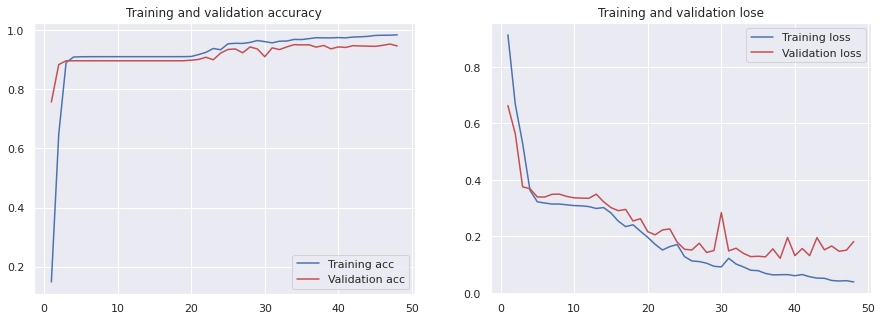

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)
    
    

fig = plt.figure()
fig.set_size_inches(15, 5)

fig.add_subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label ='Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# plt.figure()
fig.add_subplot(1, 2, 2) 
plt.plot(epochs, loss, 'b', label = "Training loss")
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and validation lose')
plt.legend()

plt.show()

### TEST

In [93]:
idx = random.randint(0, len(X_train))

#value (0~1)로 나오는데 0.5 이상을 기준으로 binary로 만듦
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose =1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose = 1)
preds_test = model.predict(X_test, verbose =1)

preds_train_t = (preds_train>0.5).astype(np.uint8)
preds_val_t = (preds_val>0.5).astype(np.uint8)
preds_test_t = (preds_test>0.7).astype(np.uint8)

1/1 [==============================] - 3s 3s/step


In [94]:
def show_img_compar(img_1, img_2,img_3):
    f, ax = plt.subplots(1, 3, figsize=(8,8))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[2].imshow(img_3)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    ax[2].axis('off')
    f.tight_layout()
    plt.show()

12


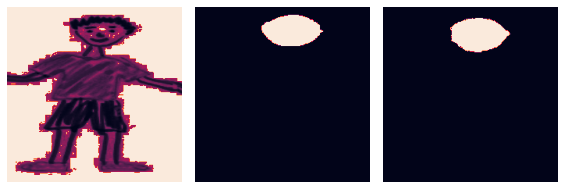

In [95]:
import random
ix = random.randint(0, len(preds_test_t))
print(ix)
# imshow(X_train[ix])
# plt.show()
# imshow(np.squeeze(Y_train[ix]))
# plt.show()
# imshow(np.squeeze(preds_train_t[ix]))
# plt.show()

show_img_compar(X_train[ix],np.squeeze(Y_train[ix]), np.squeeze(preds_train_t[ix]) )
# show_img_compar(X_test[ix], np.squeeze(Y_train[ix]),np.squeeze(preds_test_t[ix]) )

In [96]:
def show_img_compar(img_1, img_2):
    f, ax = plt.subplots(1, 2, figsize=(8,8))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    # ax[2].imshow(img_3)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    # ax[2].axis('off')
    f.tight_layout()
    plt.show()

In [ ]:
for num,i in enumerate(X_test):
    tested = preds_test_t[num]
    show_img_compar(i, tested)

In [87]:
model.save('[230412]face_annotation.h5')

model_json = model.to_json()
with open("[230412]face_annotation.json", "w") as json_file : 
    json_file.write(model_json)

model.save_weights("[230412]face_annotation.h5")
print("Saved model to disk")

Saved model to disk


### find biggest area

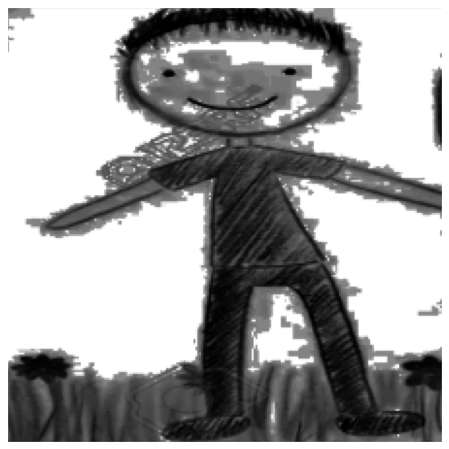

In [98]:
show(X_test[0])

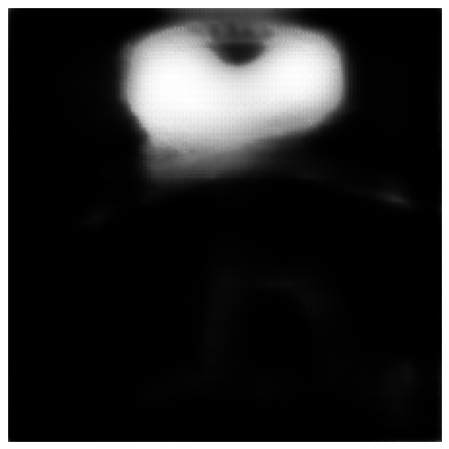

In [99]:
show(preds_test[0].reshape(224,224))

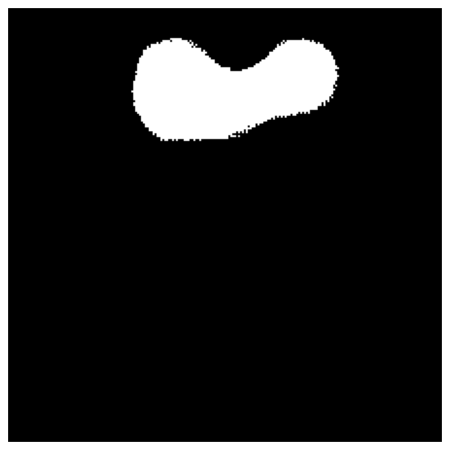

In [100]:
show(preds_test_t[0].reshape(224,224))

In [ ]:
show(mask)
coords = cv2.findNonZero(mask)

# Iterate over the coordinates and print them
for coord in coords:
    x, y = coord[0]
    print("x:", x, "y:", y)


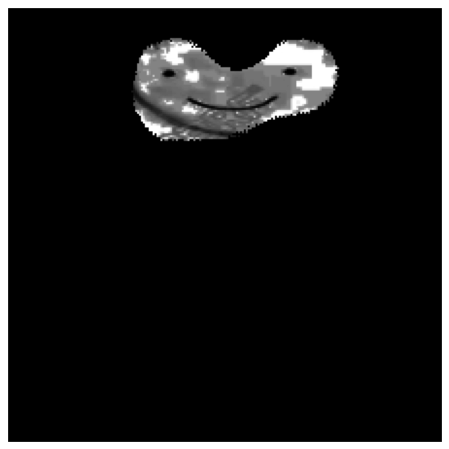

In [103]:
masked_img = cv2.bitwise_and(X_test[0], X_test[0], mask=preds_test_t[0])
show(masked_img)

In [117]:
test_img = X_test[6].copy()

In [126]:
test_list = os.listdir(TEST_PATH)
test_images=[]
for i in test_list:
    img_path = TEST_PATH+'{}'.format(i)
    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (224,224))
    test_images.append(image)


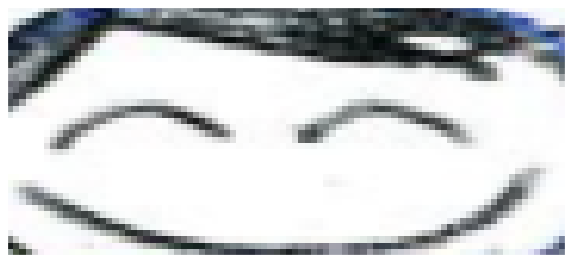

In [127]:
x,y,w,h = cv2.boundingRect(preds_test_t[6])
cropped_img = test_images[6][y:y+h, x:x+w]

show(cropped_img)

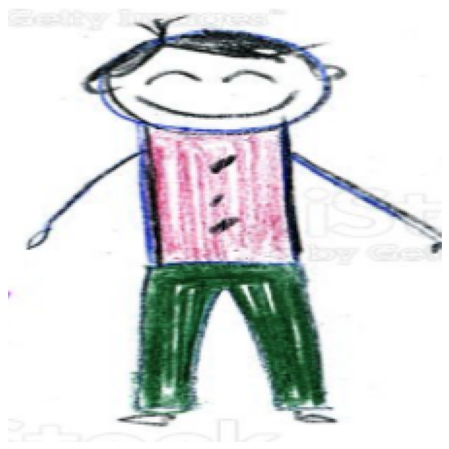

In [128]:
show(test_images[6])

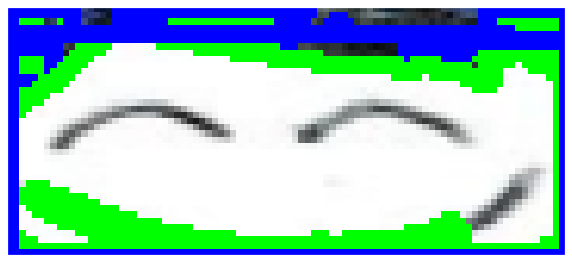

In [133]:
img = cropped_img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find the contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate over the contours and draw a bounding box around each one
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.drawContours(img, [contour], 0, (0, 255, 0), 2)
    cv2.rectangle(img, (x,y), (x+w,y+h), (0, 0, 255), 2)

# Display the resulting image
show(img)

In [141]:
img = cropped_img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to the image to separate the lines from the background
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply histogram equalization to increase the contrast of the lines
equalized = cv2.equalizeHist(thresh)

# Apply the probabilistic Hough transform to detect lines in the image
lines = cv2.HoughLinesP(equalized, rho=1, theta=np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

# Draw the detected lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

show(img)

TypeError: 'NoneType' object is not iterable

In [139]:
img = cropped_img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection to the image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Apply probabilistic Hough transform to detect lines in the image
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

# Check if lines were detected
if lines is None:
    print("No lines detected in the image")
else:
    # Sort the lines by their y-coordinate
    sorted_lines = sorted(lines, key=lambda line: line[0][1])

    # Draw the lowest line on the image
    lowest_line = sorted_lines[0]
    x1, y1, x2, y2 = lowest_line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Display the resulting image
    show(img)

No lines detected in the image


In [138]:
sorted_lines

NameError: name 'sorted_lines' is not defined